In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [110]:
df=pd.read_csv("CNC_Synthetic_Data_200_Records.csv")
df.head()

,Material,Length_mm,Width_mm,Height_mm,Volume_cm3,Feature_Count,Cycle_Time_min,Estimated_Cost_USD
0,ABS,95.56,75.88,31.94,231.61,7,26.11,42.74
1,Brass,87.96,64.10,36.86,207.84,6,18.90,66.13
2,Steel,26.36,26.51,18.69,13.06,6,3.80,5.46
3,Brass,65.07,22.55,18.15,26.63,3,6.80,11.76
4,Aluminum,14.18,64.68,12.67,11.62,7,10.69,9.76


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Material            200 non-null    object 
 1   Length_mm           200 non-null    float64
 2   Width_mm            200 non-null    float64
 3   Height_mm           200 non-null    float64
 4   Volume_cm3          200 non-null    float64
 5   Feature_Count       200 non-null    int64  
 6   Cycle_Time_min      200 non-null    float64
 7   Estimated_Cost_USD  200 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 12.6+ KB


In [112]:
df.describe()

,Length_mm,Width_mm,Height_mm,Volume_cm3,Feature_Count,Cycle_Time_min,Estimated_Cost_USD
count,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,56.407300,55.453450,27.73545,87.642850,5.115000,13.805700,25.224050
std,27.084556,26.111021,13.36076,78.081938,2.460088,8.845051,20.492095
min,10.480000,10.470000,5.02000,1.300000,1.000000,1.100000,1.150000
25%,31.725000,33.982500,16.09500,26.610000,3.000000,7.760000,10.730000
50%,57.225000,58.585000,28.11500,61.755000,5.000000,12.180000,17.785000
75%,81.717500,77.600000,39.66750,132.442500,7.000000,17.630000,34.375000
max,99.800000,99.970000,49.88000,414.440000,9.000000,51.100000,110.360000


In [113]:
df.isnull().sum()

Material              0
Length_mm             0
Width_mm              0
Height_mm             0
Volume_cm3            0
Feature_Count         0
Cycle_Time_min        0
Estimated_Cost_USD    0
dtype: int64

<Axes: xlabel='Volume_cm3'>

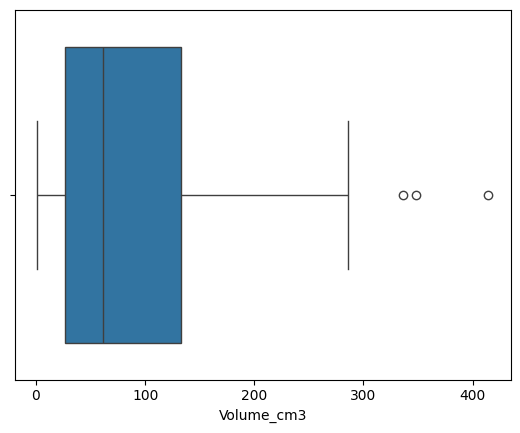

In [114]:
sns.boxplot(data=df,x='Volume_cm3')

<Axes: xlabel='Estimated_Cost_USD'>

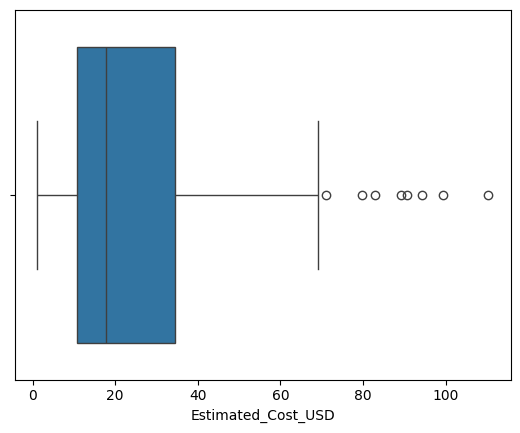

In [115]:
sns.boxplot(data=df,x='Estimated_Cost_USD')

##### The Column Estimated_Cost_USD has a few more outliers than Volume_cm3

In [116]:
df.corr(numeric_only=True)

,Length_mm,Width_mm,Height_mm,Volume_cm3,Feature_Count,Cycle_Time_min,Estimated_Cost_USD
Length_mm,1.000000,-0.000797,0.038511,0.530305,0.027699,0.459072,0.520664
Width_mm,-0.000797,1.000000,0.036882,0.498387,0.119045,0.471304,0.479382
Height_mm,0.038511,0.036882,1.000000,0.551784,-0.090454,0.443714,0.467307
Volume_cm3,0.530305,0.498387,0.551784,1.000000,0.017814,0.861825,0.927743
Feature_Count,0.027699,0.119045,-0.090454,0.017814,1.000000,0.284950,0.110005
Cycle_Time_min,0.459072,0.471304,0.443714,0.861825,0.284950,1.000000,0.878684
Estimated_Cost_USD,0.520664,0.479382,0.467307,0.927743,0.110005,0.878684,1.000000


Text(0, 0.5, 'Time cycle')

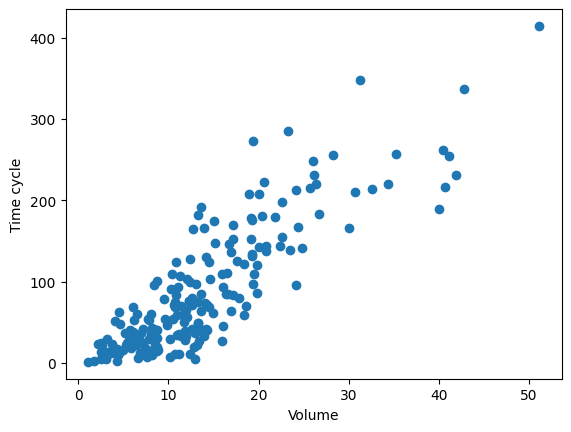

In [117]:
plt.scatter(df['Cycle_Time_min'],df['Volume_cm3'])
plt.xlabel('Volume')
plt.ylabel('Time cycle')

the size of the component easily affects the time cycle since a bigger part usually takes more time to complete it's operation and vice-versa

#### Volume_cm3 and Cycle_Time_min time have high corelation with the price since the size of the part and complexity of it's operation directly affects it's price

Text(0.5, 0.98, 'Corelation between features and Cost')

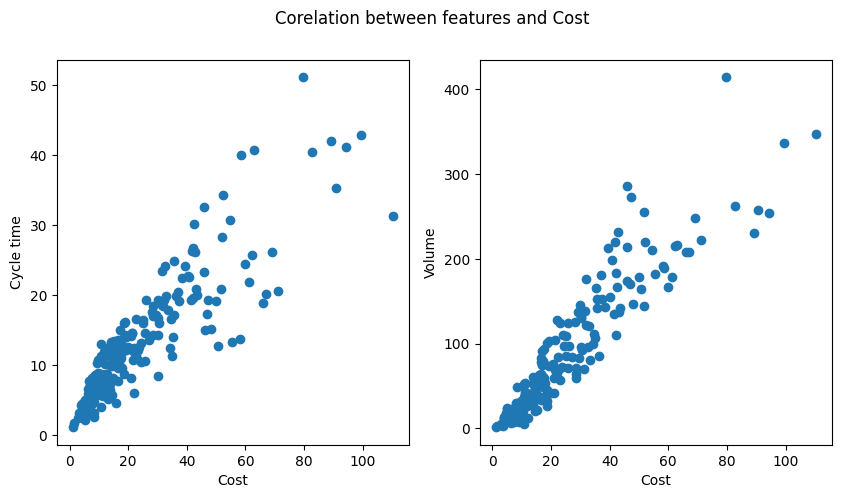

In [118]:
fig,ax=plt.subplots(1,2,figsize=(10,5))

ax[0].scatter(data=df,x='Estimated_Cost_USD',y='Cycle_Time_min')
ax[0].set_xlabel('Cost')
ax[0].set_ylabel('Cycle time')

ax[1].scatter(data=df,x='Estimated_Cost_USD',y='Volume_cm3')
ax[1].set_xlabel('Cost')
ax[1].set_ylabel('Volume')

fig.suptitle("Corelation between features and Cost")

Adding a new metric Cost/Volume

<Axes: >

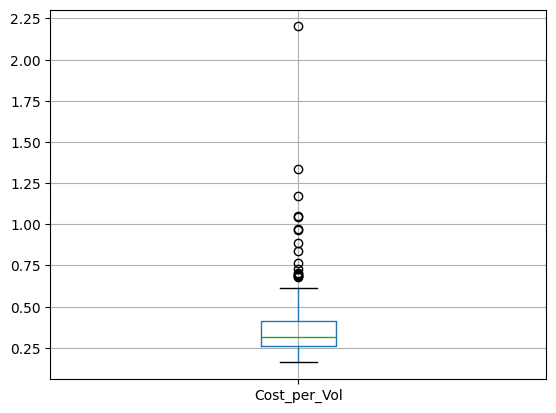

In [119]:
df['Cost_per_Vol']=df['Estimated_Cost_USD']/df['Volume_cm3']
df.boxplot('Cost_per_Vol')

the boundary of 0.25 and 2.25 is very small and if we ignore the outlier at 2.23 we can see how cost and volume affect each other.

In [120]:
X=df[['Volume_cm3','Cycle_Time_min']]
y=df['Cost_per_Vol']

In [121]:
print(X.shape)
print(y.shape)

(200, 2)
(200,)


In [122]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [123]:
print(X_train.shape)
print(y_train.shape)

(140, 2)
(140,)


In [124]:
# lm=LinearRegression()
# lm.fit(X_train,y_train)

In [125]:
from sklearn.tree import DecisionTreeRegressor

model=DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [126]:
y_pred=model.predict(X_test)

<Axes: xlabel='Cost_per_Vol'>

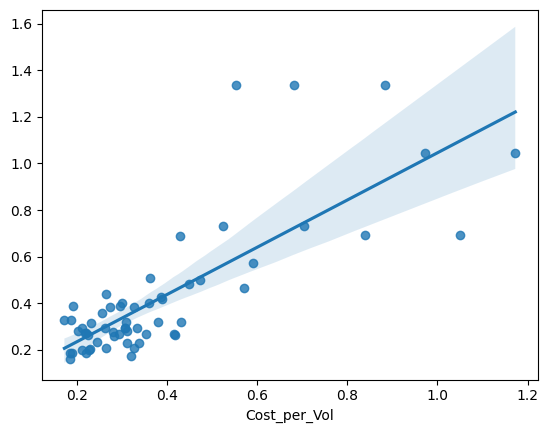

In [127]:
sns.regplot(x=y_test,y=y_pred)

In [128]:
from sklearn.metrics import mean_absolute_error,r2_score,root_mean_squared_error

In [129]:
print("mean absolute error is",mean_absolute_error(y_test,y_pred))
print("root mean square is ",root_mean_squared_error(y_test,y_pred))
print("r2 score is",r2_score(y_test,y_pred))

mean absolute error is 0.10759419002204536
root mean square is  0.17761919014089414
r2 score is 0.3460628804002598


Since the amount of datapoints is only 200 this is the best possible r2 score we can acheive